# Importações de dados brutos

In [1]:
from util import *
meus_uteis()

import os

import joblib

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from scipy import stats
from scipy.stats import mannwhitneyu, normaltest, ranksums, chisquare
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

-------------
-=< Lista >=-
-------------
0 -> printLinha()
1 -> printLis()
2 -> printDic()
3 -> timeProcess()
4 -> import_started()
5 -> img_save()
6 -> setup_img_save()
7 -> mask_corr_graphic()
8 -> structured_confusion()


In [2]:
df = pd.read_csv('./data/dados_completos.csv')
df.set_index(df.id, inplace=True)
del df["id"]
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [3]:
colunas = df.columns
perguntas = {
    colunas[4 + 1]: '1) Na imagem, o quão claramente os elementos são distinguíveis?',
    colunas[4 + 2]: '2) O quão visualmente proeminentes são os elementos da imagem?',
    colunas[4 + 3]: '8) Existem elementos da imagem que requerem descrição adicional?',
    colunas[4 + 4]: '3) O quão eficiente são os elementos da imagem na representação dos dados?',
    colunas[4 + 5]: '4) O quão útil é a aplicação de uma imagem esquemática – desenho científico ou graphic abstract para representar os dados?',
    colunas[4 + 6]: '5) O quanto a imagem é esteticamente bem elaborada?',
    colunas[4 + 7]: '9) A imagem apresentada faz você experimentar uma nova fonte de dados?',
    colunas[4 + 8]: '6) Classifique o quanto a imagem facilitou a compreensão do conteúdo da informação.',
    colunas[4 + 9]: '7) Classifique o quanto a imagem despertou o seu interesse pelo conteúdo.',
    colunas[4 + 10]: 'Qual o seu grau de formação acadêmica?',
    colunas[4 + 11]: 'Área de formação?',
}
perguntas

{'Dintinguíveis': '1) Na imagem, o quão claramente os elementos são distinguíveis?',
 'Proeminentes': '2) O quão visualmente proeminentes são os elementos da imagem?',
 'Descrição': '8) Existem elementos da imagem que requerem descrição adicional?',
 'Eficiente': '3) O quão eficiente são os elementos da imagem na representação dos dados?',
 'Útil': '4) O quão útil é a aplicação de uma imagem esquemática – desenho científico ou graphic abstract para representar os dados?',
 'Estética': '5) O quanto a imagem é esteticamente bem elaborada?',
 'Fonte': '9) A imagem apresentada faz você experimentar uma nova fonte de dados?',
 'Compreensão': '6) Classifique o quanto a imagem facilitou a compreensão do conteúdo da informação.',
 'Interesse': '7) Classifique o quanto a imagem despertou o seu interesse pelo conteúdo.',
 'Grau': 'Qual o seu grau de formação acadêmica?',
 'Área': 'Área de formação?'}

# Geral

In [4]:
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 1 to 472
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Data           472 non-null    object
 1   IP             472 non-null    object
 2   TCLE           472 non-null    object
 3   Língua         472 non-null    object
 4   Figura         472 non-null    object
 5   Dintinguíveis  472 non-null    int64 
 6   Proeminentes   472 non-null    int64 
 7   Descrição      472 non-null    object
 8   Eficiente      472 non-null    int64 
 9   Útil           472 non-null    int64 
 10  Estética       472 non-null    int64 
 11  Fonte          472 non-null    object
 12  Compreensão    472 non-null    int64 
 13  Interesse      472 non-null    int64 
 14  Grau           472 non-null    object
 15  Área           472 non-null    object
 16  Origem         472 non-null    object
dtypes: int64(7), object(10)
memory usage: 66.4+ KB


In [6]:
df.describe()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,3.786017,3.576271,3.552966,4.614407,3.567797,3.599576,3.489407
std,1.227245,1.274654,1.247227,0.909751,1.340082,1.314075,1.376129
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Tabelas de Frequência

In [7]:
col = [5,6,8,9,10,12,13]
df.columns[col]

Index(['Dintinguíveis', 'Proeminentes', 'Eficiente', 'Útil', 'Estética',
       'Compreensão', 'Interesse'],
      dtype='object')

In [8]:
index=[n for n in range(1,6)]
index.append('Total')
columns=df.columns[col]
freq = pd.DataFrame(data=np.nan, index=index, columns=columns)
freq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def organize_values(a):
    base = {1:0,2:0,3:0,4:0,5:0}
    for k in base.keys():
        try:
            base[k] = a.value_counts()[k]
        except:
            pass
    return base

In [10]:
df_pesq = df.copy()
freq_ab_pesq = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] == 'Pesquisador']
for n, v in enumerate(col):
    dict_data = organize_values(df_pesq[df_pesq.columns[col[n]]])
    dict_data['Total'] = sum(dict_data.values())
    freq_ab_pesq[df_pesq.columns[col[n]]] = dict_data.values()
freq_ab_pesq.to_csv("figure/freq_ab_pesq.csv")
freq_ab_pesq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,19,32,28,11,47,37,53
2,35,44,36,8,44,34,44
3,56,65,68,9,72,52,45
4,64,57,59,28,50,61,55
5,62,38,45,180,23,52,39
Total,236,236,236,236,236,236,236


In [11]:
df_pesq = df.copy()
freq_ab_des = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] != 'Pesquisador']
for n, v in enumerate(col):
    dict_data = organize_values(df_pesq[df_pesq.columns[col[n]]])
    dict_data['Total'] = sum(dict_data.values())
    freq_ab_des[df_pesq.columns[col[n]]] = dict_data.values()
freq_ab_des.to_csv("figure/freq_ab_des.csv")
freq_ab_des

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,8,4,10,2,3,9,7
2,21,26,26,8,14,26,19
3,30,34,37,4,23,31,34
4,61,63,76,28,62,70,71
5,116,109,87,194,134,100,105
Total,236,236,236,236,236,236,236


In [12]:
freq_rel_pesq = freq.copy()
for n in range(7):
    coluna = freq_ab_pesq.columns[n]
    freq_rel_pesq[coluna] = round(freq_ab_pesq[coluna]/freq_ab_pesq.loc['Total', coluna], 2)
freq_rel_pesq.to_csv("figure/freq_rel_pesq.csv")
freq_rel_pesq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,0.08,0.14,0.12,0.05,0.20,0.16,0.22
2,0.15,0.19,0.15,0.03,0.19,0.14,0.19
3,0.24,0.28,0.29,0.04,0.31,0.22,0.19
4,0.27,0.24,0.25,0.12,0.21,0.26,0.23
5,0.26,0.16,0.19,0.76,0.10,0.22,0.17
Total,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [13]:
freq_rel_des = freq.copy()
for n in range(7):
    coluna = freq_ab_des.columns[n]
    freq_rel_des[coluna] = round(freq_ab_des[coluna]/freq_ab_des.loc['Total', coluna], 2)
freq_rel_des.to_csv("figure/freq_rel_des.csv")
freq_rel_des

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,0.03,0.02,0.04,0.01,0.01,0.04,0.03
2,0.09,0.11,0.11,0.03,0.06,0.11,0.08
3,0.13,0.14,0.16,0.02,0.10,0.13,0.14
4,0.26,0.27,0.32,0.12,0.26,0.30,0.30
5,0.49,0.46,0.37,0.82,0.57,0.42,0.44
Total,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [14]:
index=['Sim','Não']
index.append('Total')
columns=df.columns[[7,11]]
freq = pd.DataFrame(data=np.nan, index=index, columns=columns)
freq

,Descrição,Fonte
Sim,NaN,NaN
Não,NaN,NaN
Total,NaN,NaN


In [15]:
coluna = [df.columns[7], df.columns[11]]
df_pesq = df.copy()
freq_ab_pesq = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] == 'Pesquisador'][coluna]
freq_ab_pesq.loc[['Sim','Não'],coluna[0]] = df_pesq[coluna[0]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[0]] = df_pesq[coluna[0]].value_counts().sum()
freq_ab_pesq.loc[['Sim','Não'],coluna[1]] = df_pesq[coluna[1]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[1]] = df_pesq[coluna[1]].value_counts().sum()
freq_ab_pesq.to_csv("figure/freq_ab_pesq_qnt.csv")

freq_rel_pesq = freq.copy()
freq_rel_pesq.iloc[:, 0] = round(freq_ab_pesq.iloc[:, 0]/freq_ab_pesq.iloc[-1, 0], 2)
freq_rel_pesq.iloc[:, 1] = round(freq_ab_pesq.iloc[:, 1]/freq_ab_pesq.iloc[-1, 1], 2)
freq_rel_pesq.to_csv("figure/freq_rel_pesq_qnt.csv")

freq_ab_pesq

,Descrição,Fonte
Sim,206.0,146.0
Não,30.0,90.0
Total,236.0,236.0


In [16]:
freq_rel_pesq

,Descrição,Fonte
Sim,0.87,0.62
Não,0.13,0.38
Total,1.00,1.00


In [17]:
df_pesq = df.copy()
freq_ab_pesq = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] != 'Pesquisador'][coluna]
freq_ab_pesq.loc[['Sim','Não'],coluna[0]] = df_pesq[coluna[0]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[0]] = df_pesq[coluna[0]].value_counts().sum()
freq_ab_pesq.loc[['Sim','Não'],coluna[1]] = df_pesq[coluna[1]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[1]] = df_pesq[coluna[1]].value_counts().sum()
freq_ab_pesq.to_csv("figure/freq_ab_des_qnt.csv")

freq_rel_pesq = freq.copy()
freq_rel_pesq.iloc[:, 0] = round(freq_ab_pesq.iloc[:, 0]/freq_ab_pesq.iloc[-1, 0], 2)
freq_rel_pesq.iloc[:, 1] = round(freq_ab_pesq.iloc[:, 1]/freq_ab_pesq.iloc[-1, 1], 2)
freq_rel_pesq.to_csv("figure/freq_rel_des_qnt.csv")

freq_ab_pesq

,Descrição,Fonte
Sim,168.0,191.0
Não,68.0,45.0
Total,236.0,236.0


In [18]:
freq_rel_pesq

,Descrição,Fonte
Sim,0.71,0.81
Não,0.29,0.19
Total,1.00,1.00


# Estruturação dos dados, de acordo com as perguntas e origens das imagens.

In [19]:
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [20]:
# df.groupby(['Figura','Origem']).count().to_csv('n_de_participações.csv')
df.groupby(['Figura','Origem']).count()

Data  IP  TCLE  Língua  Dintinguíveis  \
Figura           Origem                                               
Citocinas        Designer       39  39    39      39             39   
                 Pesquisador    39  39    39      39             39   
Células Tronco   Designer       40  40    40      40             40   
                 Pesquisador    40  40    40      40             40   
Febre Amarela    Designer       39  39    39      39             39   
                 Pesquisador    39  39    39      39             39   
Linfócitos       Designer       39  39    39      39             39   
                 Pesquisador    39  39    39      39             39   
Reovírus Aviário Designer       40  40    40      40             40   
                 Pesquisador    40  40    40      40             40   
T. gondii        Designer       39  39    39      39             39   
                 Pesquisador    39  39    39      39             39   

                              Proeminentes  Descrição  Eficiente  Útil  \
Figura           Origem                                                  
Citocinas        Designer               39         39         39    39   
                 Pesquisador            39         39         39    39   
Células Tronco   Designer               40         40         40    40   
                 Pesquisador            40         40         40    40   
Febre Amarela    Designer               39         39         39    39   
                 Pesquisador            39         39         39    39   
Linfócitos       Designer               39         39         39    39   
                 Pesquisador            39         39         39    39   
Reovírus Aviário Designer               40         40         40    40   
                 Pesquisador            40         40         40    40   
T. gondii        Designer               39         39         39    39   
                 Pesquisador            39         39         39    39   

                              Estética  Fonte  Compreensão  Interesse  Grau  \
Figura           Origem                                                       
Citocinas        Designer           39     39           39         39    39   
                 Pesquisador        39     39           39         39    39   
Células Tronco   Designer           40     40           40         40    40   
                 Pesquisador        40     40           40         40    40   
Febre Amarela    Designer           39     39           39         39    39   
                 Pesquisador        39     39           39         39    39   
Linfócitos       Designer           39     39           39         39    39   
                 Pesquisador        39     39           39         39    39   
Reovírus Aviário Designer           40     40           40         40    40   
                 Pesquisador        40     40           40         40    40   
T. gondii        Designer           39     39           39         39    39   
                 Pesquisador        39     39           39         39    39   

                              Área  
Figura           Origem             
Citocinas        Designer       39  
                 Pesquisador    39  
Células Tronco   Designer       40  
                 Pesquisador    40  
Febre Amarela    Designer       39  
                 Pesquisador    39  
Linfócitos       Designer       39  
                 Pesquisador    39  
Reovírus Aviário Designer       40  
                 Pesquisador    40  
T. gondii        Designer       39  
                 Pesquisador    39

In [21]:
colunas_perguntas = df.columns[[5,6,8,9,10,12,13,16]]
df_perguntas = df[colunas_perguntas].copy()
df_perguntas.head()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse,Origem
id,,,,,,,,
1,2,1,1,5,2,1,1,Pesquisador
2,3,3,2,2,4,4,2,Designer
3,4,3,3,5,4,3,3,Pesquisador
4,4,4,5,5,5,5,5,Designer
5,5,1,5,5,2,5,4,Pesquisador


# Estrutrando o dado com **todas** as observações, por Origem. Teste de Willcoxon baseado em ranquiamento (rank-sum)

In [22]:
array_pesquisador = np.array(df_perguntas.query("Origem == 'Pesquisador'"))[:,:-1].reshape(-1,)
array_designer = np.array(df_perguntas.query("Origem != 'Pesquisador'"))[:,:-1].reshape(-1,)
array_designer.mean()

4.147094430992736

In [23]:
array_pesquisador.mean()

3.3347457627118646

In [24]:
df_total = pd.DataFrame(data=[array_designer,array_pesquisador]).T
df_total.columns = ['Designer','Pesquisador']
df_total.describe()

,Designer,Pesquisador
count,1652.000000,1652.000000
mean,4.147094,3.334746
std,1.086578,1.369806
min,1.000000,1.000000
25%,4.000000,2.000000
50%,5.000000,3.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [25]:
g = 1
campo = False

Not save


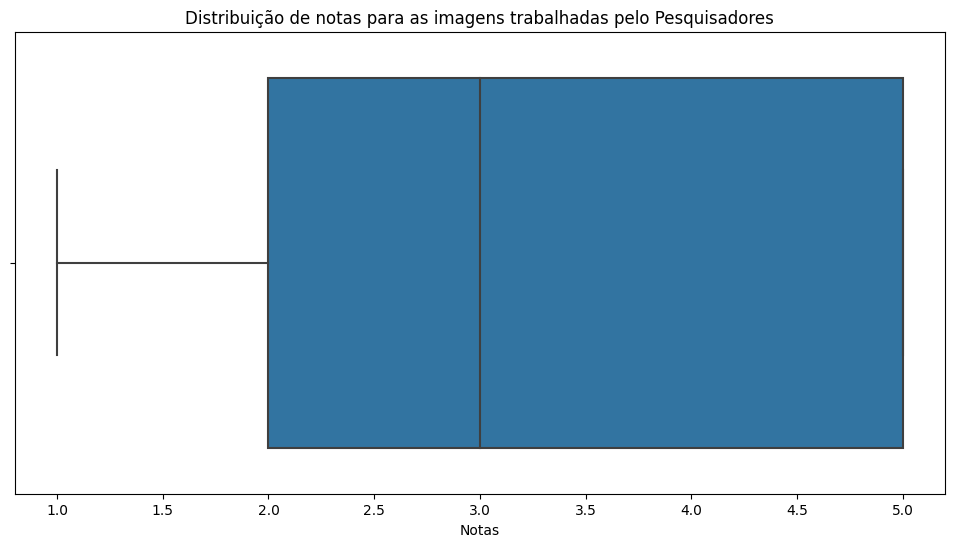

In [26]:
ax = sns.boxplot(x=df_total.Pesquisador)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Notas")
ax.set_title("Distribuição de notas para as imagens trabalhadas pelo Pesquisadores")
img_save(campo=campo, g=str(g)+'_NotasPesquisador', date=timeProcess()[1])
plt.show(ax)

Not save


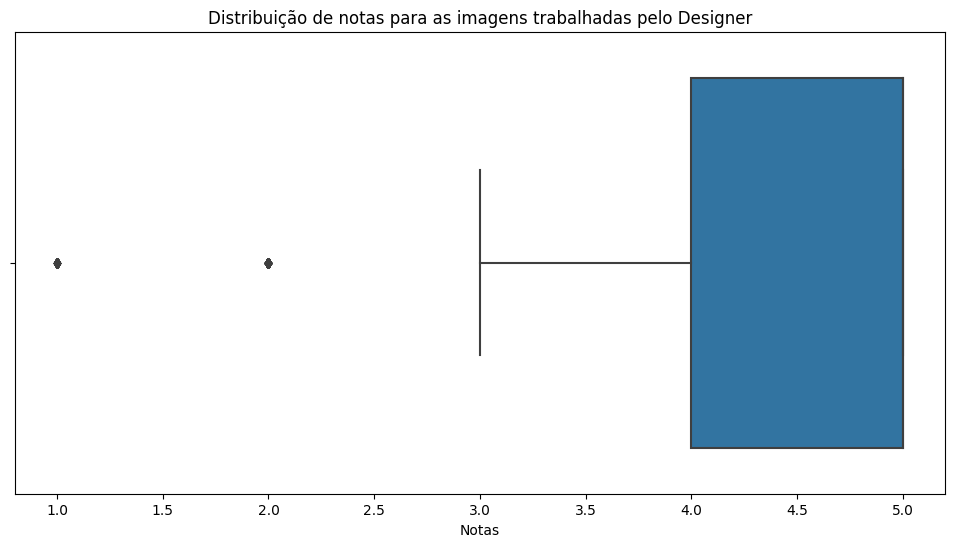

In [27]:
g += 1
ax = sns.boxplot(x=df_total.Designer)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Notas")
ax.set_title("Distribuição de notas para as imagens trabalhadas pelo Designer")
img_save(campo=campo, g=str(g)+'_NotasDesigner', date=timeProcess()[1])
plt.show(ax)

In [28]:
from scipy.stats import normaltest, ranksums
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

In [29]:
_, p = ranksums(df_total.Pesquisador, df_total.Designer)
p

1.8778837722593852e-65

In [30]:
pesq = {
    'Media': round(df_total.Pesquisador.mean(), 3),
    "IC (95%) super": zconfint(df_total.Pesquisador)[0].round(3),
    "IC (95%) infer": zconfint(df_total.Pesquisador)[1].round(3),
    "p-value": p
}
pesq

{'Media': 3.335,
 'IC (95%) super': 3.269,
 'IC (95%) infer': 3.401,
 'p-value': 1.8778837722593852e-65}

In [31]:
des = {
    'Media': round(df_total.Designer.mean(), 3),
    "IC (95%) super": zconfint(df_total.Designer)[0].round(3),
    "IC (95%) infer": zconfint(df_total.Designer)[1].round(3),
    "p-value": p
}
des

{'Media': 4.147,
 'IC (95%) super': 4.095,
 'IC (95%) infer': 4.199,
 'p-value': 1.8778837722593852e-65}

In [32]:
df_statistica_total = pd.DataFrame(data=[pesq,des], index=['Pesquisador','Designer'])
df_statistica_total.iloc[0,-1] = np.nan
# df_statistica_total.to_csv('figure/df_statistica_total.csv')
df_statistica_total

,Media,IC (95%) super,IC (95%) infer,p-value
Pesquisador,3.335,3.269,3.401,NaN
Designer,4.147,4.095,4.199,1.877884e-65


# Estrutrando o dado **por pergunta** as observações, por Origem

In [33]:
df_perguntas.groupby('Origem').mean()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
Origem,,,,,,,
Designer,4.084746,4.046610,3.864407,4.711864,4.313559,3.957627,4.050847
Pesquisador,3.487288,3.105932,3.241525,4.516949,2.822034,3.241525,2.927966


In [34]:
df_statistica_perguntas = np.array(df_perguntas.groupby('Origem').mean())
df_statistica_perguntas

array([[4.08474576, 4.04661017, 3.86440678, 4.71186441, 4.31355932,
        3.95762712, 4.05084746],
       [3.48728814, 3.1059322 , 3.24152542, 4.51694915, 2.8220339 ,
        3.24152542, 2.9279661 ]])

In [35]:
lista_p_value_perguntas = [ranksums(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i], df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i])[1] for i in range(len(colunas_perguntas)-1)]
lista_p_value_perguntas

[9.850865681131528e-08,
 3.955539592933044e-15,
 7.700974073667129e-08,
 0.20522235993296356,
 2.0311932874351267e-33,
 1.0680428395514092e-08,
 1.914831439973601e-17]

In [36]:
df_statistica_perguntas = np.append(df_statistica_perguntas, lista_p_value_perguntas).reshape(3,7)
df_statistica_perguntas

array([[4.08474576e+00, 4.04661017e+00, 3.86440678e+00, 4.71186441e+00,
        4.31355932e+00, 3.95762712e+00, 4.05084746e+00],
       [3.48728814e+00, 3.10593220e+00, 3.24152542e+00, 4.51694915e+00,
        2.82203390e+00, 3.24152542e+00, 2.92796610e+00],
       [9.85086568e-08, 3.95553959e-15, 7.70097407e-08, 2.05222360e-01,
        2.03119329e-33, 1.06804284e-08, 1.91483144e-17]])

In [37]:
lista_intervalo_perguntas_designer = [zconfint(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
lista_intervalo_perguntas_designer

[(3.940521110203359, 4.2289704152203695),
 (3.9067295287063537, 4.1864908102766965),
 (3.7170098518971373, 4.011803707424896),
 (4.617555624864619, 4.806173188694703),
 (4.191017480637766, 4.43610116343003),
 (3.809780863514001, 4.105473373774134),
 (3.912234629039192, 4.189460286215045)]

In [38]:
lista_intervalo_perguntas_pesquisador = [zconfint(df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
lista_intervalo_perguntas_pesquisador

[(3.327858657200211, 3.646717613986229),
 (2.9440474305027755, 3.2678169762768854),
 (3.080739433082298, 3.4023114143753292),
 (4.3835455895432975, 4.650352715541448),
 (2.662699255667009, 2.9813685409431607),
 (3.0674992185632393, 3.415551628894388),
 (2.7483495133089955, 3.107582690080835)]

In [39]:
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,0]).reshape(4,7)
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,1]).reshape(5,7)
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,0]).reshape(6,7)
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,1]).reshape(7,7)
df_statistica_perguntas

array([[4.08474576e+00, 4.04661017e+00, 3.86440678e+00, 4.71186441e+00,
        4.31355932e+00, 3.95762712e+00, 4.05084746e+00],
       [3.48728814e+00, 3.10593220e+00, 3.24152542e+00, 4.51694915e+00,
        2.82203390e+00, 3.24152542e+00, 2.92796610e+00],
       [9.85086568e-08, 3.95553959e-15, 7.70097407e-08, 2.05222360e-01,
        2.03119329e-33, 1.06804284e-08, 1.91483144e-17],
       [3.94052111e+00, 3.90672953e+00, 3.71700985e+00, 4.61755562e+00,
        4.19101748e+00, 3.80978086e+00, 3.91223463e+00],
       [4.22897042e+00, 4.18649081e+00, 4.01180371e+00, 4.80617319e+00,
        4.43610116e+00, 4.10547337e+00, 4.18946029e+00],
       [3.32785866e+00, 2.94404743e+00, 3.08073943e+00, 4.38354559e+00,
        2.66269926e+00, 3.06749922e+00, 2.74834951e+00],
       [3.64671761e+00, 3.26781698e+00, 3.40231141e+00, 4.65035272e+00,
        2.98136854e+00, 3.41555163e+00, 3.10758269e+00]])

In [40]:
index = [
           'Designer Média',
           'Pesquisador Média',
           'p-value',
           'Designer IC infer (95%)',
           'Designer IC super (95%)',
           'Pesquisador IC infer (95%)',
           'Pesquisador IC super (95%)',
]
valores = [
           'Média',
           'Média',
           'p-value',
           'IC infer (95%)',
           'IC super (95%)',
           'IC infer (95%)',
           'IC super (95%)',
]
origem = [
           'Designer',
           'Pesquisador',
           'Designer/Pesquisador',
           'Designer',
           'Designer',
           'Pesquisador',
           'Pesquisador',
]
df_statistica_perguntas = pd.DataFrame(data=df_statistica_perguntas, index=index, columns=colunas_perguntas[:-1]).round(3).reset_index()
df_statistica_perguntas

,index,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
0,Designer Média,4.085,4.047,3.864,4.712,4.314,3.958,4.051
1,Pesquisador Média,3.487,3.106,3.242,4.517,2.822,3.242,2.928
2,p-value,0.000,0.000,0.000,0.205,0.000,0.000,0.000
3,Designer IC infer (95%),3.941,3.907,3.717,4.618,4.191,3.810,3.912
4,Designer IC super (95%),4.229,4.186,4.012,4.806,4.436,4.105,4.189
5,Pesquisador IC infer (95%),3.328,2.944,3.081,4.384,2.663,3.067,2.748
6,Pesquisador IC super (95%),3.647,3.268,3.402,4.650,2.981,3.416,3.108


In [ ]:
df_statistica_perguntas.loc[:, 'Origem'] = origem
df_statistica_perguntas.loc[:, 'Valor'] = valores
df_statistica_perguntas = df_statistica_perguntas.iloc[[0,3,4,1,5,6,2]]
df_statistica_perguntas

In [ ]:
df_statistica_perguntas.drop(['index'], axis=1, inplace=True)
df_statistica_perguntas.set_index(['Origem','Valor'], inplace=True)
df_statistica_perguntas

In [ ]:
# df_statistica_perguntas.to_csv('df_statistica_perguntas.csv')

In [ ]:
df_statistica_perguntas.T

In [ ]:
# df_statistica_perguntas.T.to_csv('df_statistica_perguntas_T.csv')

# Esruturação do dado por diferentes subdivisões

In [ ]:
def tabela_medias(df_selecionada):
    colunas_perguntas = df.columns[[5,6,8,9,10,12,13,16]]
    df_perguntas = df_selecionada[colunas_perguntas].copy()
    df_statistica_perguntas = np.array(df_perguntas.groupby('Origem').mean())
    lista_p_value_perguntas = [ranksums(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i], df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i])[1] for i in range(len(colunas_perguntas)-1)]
    df_statistica_perguntas = np.append(df_statistica_perguntas, lista_p_value_perguntas).reshape(3,7)
    lista_intervalo_perguntas_designer = [zconfint(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
    lista_intervalo_perguntas_pesquisador = [zconfint(df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
    df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,0]).reshape(4,7)
    df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,1]).reshape(5,7)
    df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,0]).reshape(6,7)
    df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,1]).reshape(7,7)
    index = [
            'Designer Média',
            'Pesquisador Média',
            'p-value',
            'Designer IC infer (95%)',
            'Designer IC super (95%)',
            'Pesquisador IC infer (95%)',
            'Pesquisador IC super (95%)',
    ]
    valores = [
            'Média',
            'Média',
            'p-value',
            'IC infer (95%)',
            'IC super (95%)',
            'IC infer (95%)',
            'IC super (95%)',
    ]
    origem = [
            'Designer',
            'Pesquisador',
            'Designer/Pesquisador',
            'Designer',
            'Designer',
            'Pesquisador',
            'Pesquisador',
    ]
    df_statistica_perguntas = pd.DataFrame(data=df_statistica_perguntas, index=index, columns=colunas_perguntas[:-1]).round(3).reset_index()
    df_statistica_perguntas.loc[:, 'Origem'] = origem
    df_statistica_perguntas.loc[:, 'Valor'] = valores
    df_statistica_perguntas = df_statistica_perguntas.iloc[[0,3,4,1,5,6,2]]
    df_statistica_perguntas.drop(['index'], axis=1, inplace=True)
    df_statistica_perguntas.set_index(['Origem','Valor'], inplace=True)
    df_statistica_perguntas = df_statistica_perguntas.T
    lista_p_valor = df_statistica_perguntas[('Designer/Pesquisador','p-value')].values
    df_statistica_perguntas[('Designer/Pesquisador','p-value')] = ['<0.001' if i < 0.1 else i for i in lista_p_valor]
    return df_statistica_perguntas

## Área

In [ ]:
colunas_perguntas = df.columns[[5,6,8,9,10,12,13,15,16]]
# df_perguntas = df[df['Área'] != 'Biológicas'][colunas_perguntas].copy()
df_perguntas = df[colunas_perguntas].copy()
df_perguntas.head()

In [ ]:
df_perguntas.groupby(['Área']).count()['Útil']

In [ ]:
df_perguntas.groupby(['Origem','Área']).count()['Útil'].values

In [ ]:
df_statistica_perguntas_area = df_perguntas.groupby(['Origem','Área']).mean().round(2)
df_statistica_perguntas_area['n'] = df_perguntas.groupby(['Origem','Área']).count()['Útil'].values
df_statistica_perguntas_area = df_statistica_perguntas_area.T
df_statistica_perguntas_area

In [ ]:
coluna_filtro = 'Área'
campo_pesquisa = 'Biológicas'
df_statistica_perguntas_biologicas = tabela_medias(df[df[coluna_filtro] == campo_pesquisa])
# df_statistica_perguntas_biologicas.to_csv('df_statistica_perguntas_biologicas.csv')
df_statistica_perguntas_biologicas

In [ ]:
campo_pesquisa = 'Exatas'
df_statistica_perguntas_exatas = tabela_medias(df[df[coluna_filtro] == campo_pesquisa])
# df_statistica_perguntas_exatas.to_csv('df_statistica_perguntas_exatas.csv')
df_statistica_perguntas_exatas

In [ ]:
campo_pesquisa = 'Humanas'
df_statistica_perguntas_humanas = tabela_medias(df[df[coluna_filtro] == campo_pesquisa])
# df_statistica_perguntas_humanas.to_csv('df_statistica_perguntas_humanas.csv')
df_statistica_perguntas_humanas

## Grau

In [ ]:
colunas_perguntas = df.columns[[5,6,8,9,10,12,13,14,16]]
df_perguntas = df[colunas_perguntas].copy()
df_perguntas.head()

In [ ]:
df_perguntas.groupby(['Grau']).count()['Útil']

In [ ]:
df_perguntas.groupby(['Origem','Grau']).count()['Útil'].values

In [ ]:
df_statistica_perguntas_area = df_perguntas.groupby(['Origem','Grau']).mean().round(2)
df_statistica_perguntas_area['n'] = df_perguntas.groupby(['Origem','Grau']).count()['Útil'].values
df_statistica_perguntas_area = df_statistica_perguntas_area.T
df_statistica_perguntas_area

In [ ]:
tipos_grau = list(df['Grau'].value_counts().index)
tipos_grau

In [ ]:
coluna_filtro = 'Grau'
campo_pesquisa = tipos_grau[3]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_gradua = tabela_medias(temp)
# df_statistica_perguntas_gradua.to_csv('df_statistica_perguntas_gradua.csv')
df_statistica_perguntas_gradua

In [ ]:
campo_pesquisa = tipos_grau[2]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_posDoc = tabela_medias(temp)
# df_statistica_perguntas_posDoc.to_csv('df_statistica_perguntas_posDoc.csv')
df_statistica_perguntas_posDoc

In [ ]:
print(tipos_grau[2])
print(tipos_grau[3])
temp = df[(df[coluna_filtro] == tipos_grau[2]) | (df[coluna_filtro] == tipos_grau[3])]
df_statistica_perguntas_posGradGrad = tabela_medias(temp)
# df_statistica_perguntas_posGradGrad.to_csv('df_statistica_perguntas_posGradGrad.csv')
df_statistica_perguntas_posGradGrad

In [ ]:
campo_pesquisa = tipos_grau[0]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_mestrado = tabela_medias(temp)
# df_statistica_perguntas_mestrado.to_csv('df_statistica_perguntas_mestrado.csv')
df_statistica_perguntas_mestrado

In [ ]:
campo_pesquisa = tipos_grau[1]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_doutorado = tabela_medias(temp)
# df_statistica_perguntas_doutorado.to_csv('df_statistica_perguntas_doutorado.csv')
df_statistica_perguntas_doutorado

## Grau de formação, comparado pela área biológica ou não biológica

In [ ]:
tipos_grau

In [ ]:
temp = df[(df['Grau'] == tipos_grau[3])]['Estética'].sample(frac=1, random_state=101)
medias = [temp[:i].mean() for i in range(1, len(temp))]
plt.figure(figsize=(12,6))
plt.plot(medias)
plt.ylabel('Média das notas')
plt.xlabel('Número de respostas')
plt.title('Médias progressivas das notas para a questão 6. Estética - '+tipos_grau[3])
plt.show()

In [ ]:
campo_pesquisa = tipos_grau[0]
print(campo_pesquisa)
df_area_biologica = df[(df['Área'] == 'Biológicas') & (df['Grau'] == campo_pesquisa)].copy()
df_area_biologica['Área'].value_counts()

In [ ]:
tabela_medias(df_area_biologica)

In [ ]:
temp = df[(df['Área'] == 'Biológicas') & (df['Grau'] == campo_pesquisa)]['Compreensão'].sample(frac=1, random_state=101)
medias = [temp[:i].mean() for i in range(1, len(temp))]
plt.figure(figsize=(12,6))
plt.plot(medias)
plt.ylabel('Média das notas')
plt.xlabel('Número de respostas')
plt.title('Médias progressivas das notas para a questão 6. Compreenção - '+campo_pesquisa+' da área biológica.')
plt.show()

In [ ]:
df_area_nao_biologica = df[(df['Área'] != 'Biológicas') & (df['Grau'] == campo_pesquisa)].copy()
df_area_nao_biologica['Área'].value_counts()

In [ ]:
tabela_medias(df_area_nao_biologica)

In [ ]:
temp = df[(df['Área'] != 'Biológicas') & (df['Grau'] == campo_pesquisa)]['Compreensão'].sample(frac=1, random_state=101)
medias = [temp[:i].mean() for i in range(1, len(temp))]
plt.figure(figsize=(12,6))
plt.plot(medias)
plt.ylabel('Média das notas')
plt.xlabel('Número de respostas')
plt.title('Médias progressivas das notas para a questão 6. Compreenção - '+campo_pesquisa+' não da área biológica.')
plt.show()